# bike sharing demand

### excel analysis

Bike sharing demand

1.colums 개별 분석

1.datetime 
1)train 데이터는 1~20일까지 21~ 데이터는 test에
2)feature 순위 1-month, hour/ 2-year
3)출퇴근

2.season
1)계절별로 count가 다를 거 같음
2)겨울에 잘 안빌릴거 같음
3)

3.holiday
1)1인경우 가 count 높을것으로 예상됨
2)workingday 
3)

4.workingday
1)출퇴근 시간에 count 많을듯
2)weather 나 다른 기후에 큰 영향을 받을 거 같지 않음 - 날이 좋으나 나쁘나 출근은 해야함, but 비나눈등 심히 안좋은 날은 제외
3)

5.weather
1)1에 까까울 수록 점점 count 많아질듯
2)
3)

6.temp
1)온도가 적당할때 count올라달듯
2)humidity, windspeed
3)atemp와 비례할듯

7.atemp
1)temp랑 유사 할듯
2)
3)

8.humidity
1)높을 수록 count 감소
2)
3)

9.winddpeed
1)높을 수록 count 감소
2)
3)


### Load Dataset

In [1]:
import pandas as pd

train = pd.read_csv("data/bike_sharing_demand/train.csv")
test = pd.read_csv("data/bike_sharing_demand/test.csv")

In [2]:
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Preprocessing

In [4]:
# 머신러닝이 읽을 수 있는 데이터로 바꿔주기

#### 1.Parse datetime

In [5]:
# train
train["datetime"] = pd.to_datetime(train["datetime"])

train["datetime_year"] = train["datetime"].dt.year
train["datetime_month"] = train["datetime"].dt.month
train["datetime_day"] = train["datetime"].dt.day
train["datetime_hour"] = train["datetime"].dt.hour
train["datetime_minute"] = train["datetime"].dt.minute
train["datetime_second"] = train["datetime"].dt.second

datetime_colums = ["datetime","datetime_year","datetime_month","datetime_day","datetime_hour","datetime_minute","datetime_second"]
print(train.shape)
train[datetime_colums].head()

(10886, 18)


,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [6]:
# test
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime_year"] = test["datetime"].dt.year
test["datetime_month"] = test["datetime"].dt.month
test["datetime_day"] = test["datetime"].dt.day
test["datetime_hour"] = test["datetime"].dt.hour
test["datetime_minute"] = test["datetime"].dt.minute
test["datetime_second"] = test["datetime"].dt.second

datetime_colums = ["datetime","datetime_year","datetime_month","datetime_day","datetime_hour","datetime_minute","datetime_second"]
print(test.shape)
test[datetime_colums].head()

(6493, 15)


,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


### Explore

In [7]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

#### 1.datetime

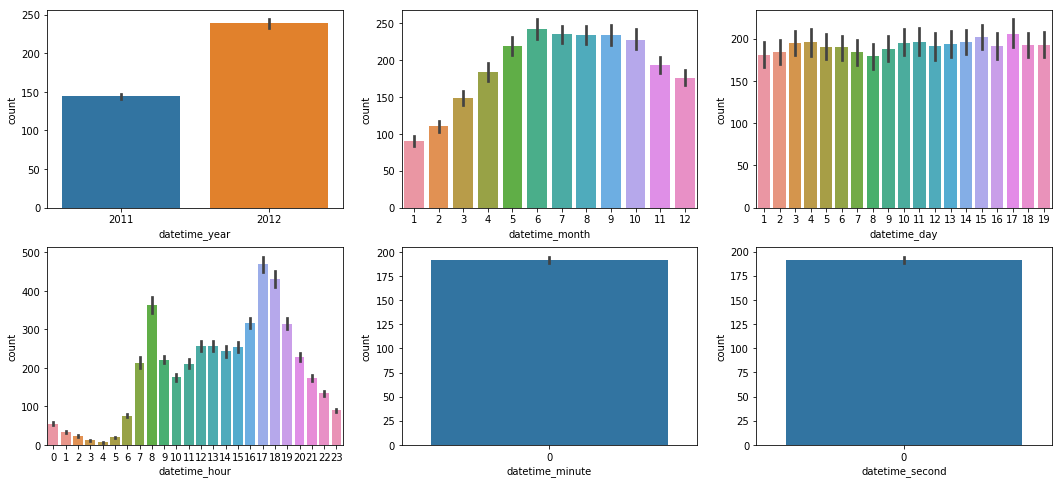

In [8]:
# 시각화

# 한번에 여러개 보여줄때
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
# 사이즈 조절
figure.set_size_inches(18,8)

sns.barplot(data=train, x="datetime_year", y="count", ax=ax1)
# 2011년에 비해 2012년에 회사가 성장함
sns.barplot(data=train, x="datetime_month", y="count", ax=ax2)
# 평균적으로 겨울 보다 여름 대여량이 높음 / 겨울에서 1월과 12월 비교시 12월이 2배 가까이 높음
sns.barplot(data=train, x="datetime_day", y="count", ax=ax3)
# my - train 과 test 를 나눈 기준점 -> train 에는 있는 데이터가 test 에는 없다는 이야기임 그래서 비교가 불가능
sns.barplot(data=train, x="datetime_hour", y="count", ax=ax4)
# my - 평균적으로 새벽에 대여량 낮음 / 낮 타임에 많고 / 특히 출 퇴근 시간에 급증 -> 출퇴근 안한는 날은?
sns.barplot(data=train, x="datetime_minute", y="count", ax=ax5)
# 기록되지 않음
sns.barplot(data=train, x="datetime_second", y="count", ax=ax6)
# 기록되지 않음

# feature datetime 순위
# 1) datetime_hour, datetime_month
# 2) datetime_year
# 3) datetime_day, datetime_minute, datetime_second - 사용 안함

In [9]:
# datetime_year
# 1.회사가 성장했음
# -> 
# datetime_ month
# 1.여름,가을(5~10월)이 대여량 높음 2.12월이 1월의 두배임
# -> 
# datetime_day
# 데이터 분석 불필요 - train / text 의 나누는 기준이라 서로 다른데이터를 가지고 있음(train.1~20 test.21~)
# datetime_hour
# 1.활동시간(7~20시)까지 대여량 많음 2.7~9시,14~19시 대여량 급증(출퇴근 시간)
# -> 출퇴근 안하는 날(holiday)에는?
# datetime_minute
# 데이터 분석 불필요 - 데이터 없음
# datetime_second
# 데이터 분석 불필요 - 데이터 없음

#####  시각화 결과

1. month,hour 중요 year 보통 day,minute,second 불필요
2. working day가 1일때의 출퇴근 시간 count 분석 / holiday 가 1일때의 시간별 대여량 분석

In [10]:
# working day가 1일때의 출퇴근 시간 분석
working_date = train[train["workingday"] == 1]

print(working_date.shape)
working_date.head()

(7412, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,2011,1,3,0,0,0
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,2011,1,3,1,0,0
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,2011,1,3,4,0,0
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,2011,1,3,5,0,0
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,2011,1,3,6,0,0


In [11]:
# working day가 1일때의 출퇴근 시간 분석
holiday_date = train[train["holiday"] == 1]

print(holiday_date.shape)
holiday_date.head()

(311, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
372,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17,2011,1,17,0,0,0
373,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16,2011,1,17,1,0,0
374,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8,2011,1,17,2,0,0
375,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2,2011,1,17,3,0,0
376,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3,2011,1,17,4,0,0


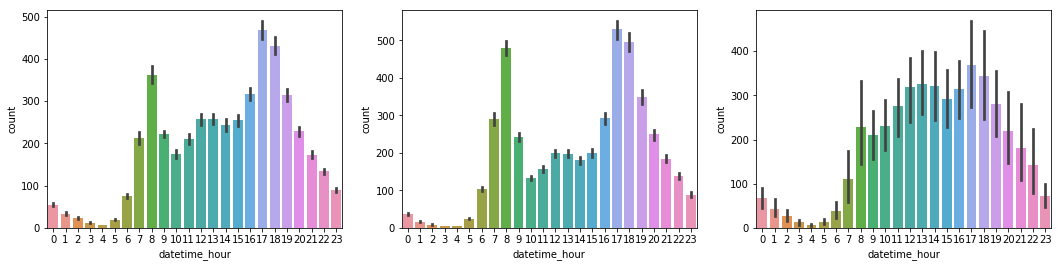

In [12]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
# 사이즈 조절
figure.set_size_inches(18,4)

sns.barplot(data=train, x="datetime_hour", y="count", ax=ax1)
sns.barplot(data=working_date, x="datetime_hour", y="count", ax=ax2)
sns.barplot(data=holiday_date, x="datetime_hour", y="count", ax=ax3)

##### 예측 모댈 개선 방안

1. workingday == 1 일때, 다른 시간대에 비해 출퇴근 시간 count 량이 많음
2. holiday ==1 일때는 모수가 좀 적기는 하지만, workingday == 1 에 비해 활동시간에 골고루 빌림

#### 2.season

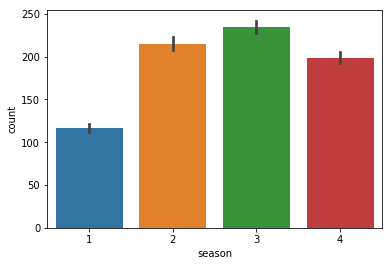

In [13]:
# 시각화

sns.barplot(data=train, x="season", y="count")

#####  시각화 결과

1. seson이 일반적으로 나누는 기준과 다르게 나눠져 있어서 변경하면 더 확실한 데이터가 나올 듯합니다.
     * 변경전 1:1~3월 2:4~6월 3:7~9월 4:10~12월
     * 변경후 1:3~5월 2:6~8월 3:9~11월 4:12~1월

In [14]:
train["re_season"] = 4

train.loc[(3 <= train["datetime_month"]) & (train["datetime_month"] < 6), "re_season"] = 1
train.loc[(6 <= train["datetime_month"]) & (train["datetime_month"] < 9), "re_season"] = 2
train.loc[(9 <= train["datetime_month"]) & (train["datetime_month"] < 12), "re_season"] = 3

train[["datetime_month","re_season"]].head()

,datetime_month,re_season
0,1,4
1,1,4
2,1,4
3,1,4
4,1,4


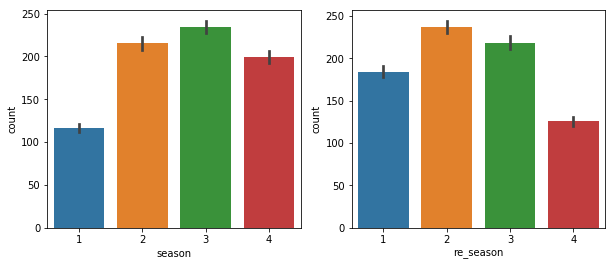

In [15]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
# 사이즈 조절
figure.set_size_inches(10,4)

sns.barplot(data=train, x="season", y="count", ax=ax1)
sns.barplot(data=train, x="re_season", y="count", ax=ax2)

##### 예측 모댈 개선 방안

1. 여름 가을 봄 겨울 순으로 대여량 감소함

#### 3.holiday

In [16]:
# 시각화 1.datetime 참조

#### 4.workingday

In [17]:
# 시각화 1.datetime 참조

In [18]:
# 연구해봐야함
# weather 나 다른 기후에 큰 영향을 받을 거 같지 않음 - 날이 좋으나 나쁘나 출근은 해야함, but 비나눈등 심히 안좋은 날은 제외

#### 5.weather

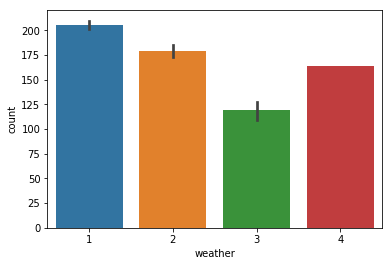

In [19]:
# 시각화
sns.barplot(data=train, x="weather", y="count")

#####  시각화 결과

1. 예상대로 날이 좋을 수록 대여량이 많은 하지만 4 데이터가 갑자기 올라감 그리고 신뢰구간도 없음 4번 확인필요

In [20]:
# 모수 부터 확인
weather_4 = train[train["weather"] == 4]

print(weather_4.shape)
weather_4

(1, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,re_season
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0,4


In [21]:
# 모수 부터 확인
weather_4 = test[test["weather"] == 4]

print(weather_4.shape)
weather_4

(2, 15)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16,0,0
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1,0,0


##### 예측 모델 개선방안

1. 4에 대한 모수가 절대적으로 부족, test엥서도 2개 뿐 무시하고 가도 될듯

#### 6.temp

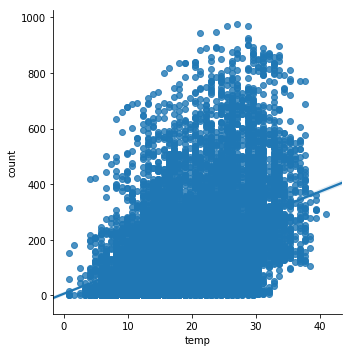

In [22]:
# 시각화

#figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

#figure.set_size_inches(10,4)

sns.lmplot(data=train, x="temp", y="count")

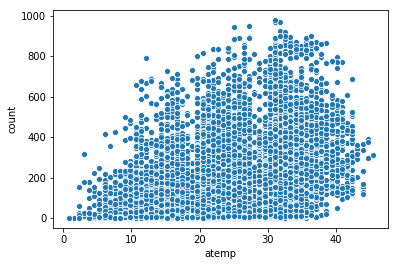

In [23]:
sns.scatterplot(data=train, x="atemp", y="count")

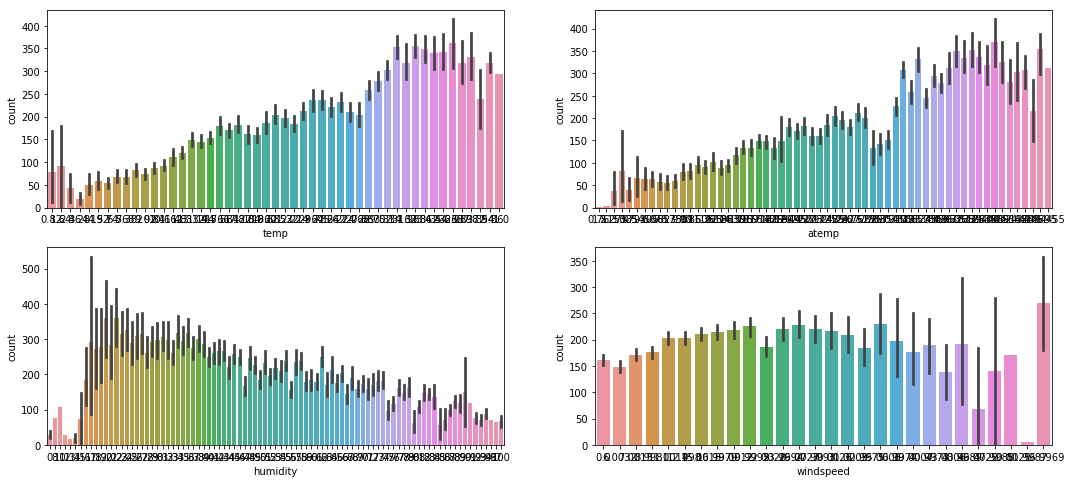

In [24]:
# 한번에 여러개 보여줄때
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
# 사이즈 조절
figure.set_size_inches(18,8)

sns.barplot(data=train, x="temp", y="count", ax=ax1)
sns.barplot(data=train, x="atemp", y="count", ax=ax2)
sns.barplot(data=train, x="humidity", y="count", ax=ax3)
sns.barplot(data=train, x="windspeed", y="count", ax=ax4)

##### 시각화 결과

1. temp 또는 atemp가 올라갈 수록 대여량 높아짐(atemp에서 중간에 훅 꺼지는 부분 확인 필요)
2. temp 상승, humidity 하강, windspeed 적당 할때 대여량 많아짐

#### 예측 모델 개선 방안

1. atemp temp의 관계 확인 필요
2. temp는 머신 러닝 데이터 스스로도 판단하여 결과를 낼 수 있는 데이터를 가지고 있다고 판단됨

#### 7.atemp

In [25]:
# 시각화
# temp 와 windspeed 로 계산 하는 atemp

#### 8.humidity

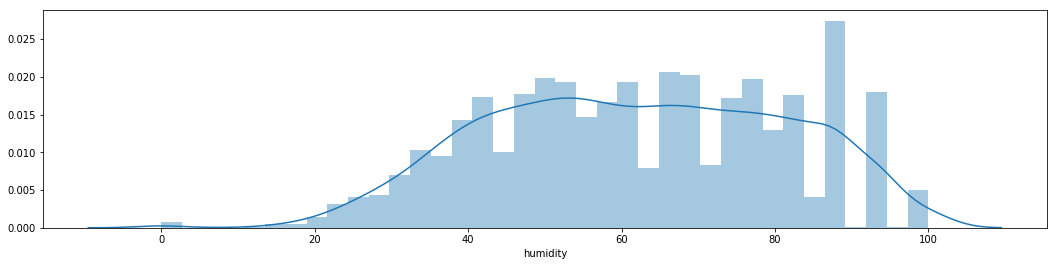

In [26]:
# 시각화

plt.figure(figsize = (18, 4))
sns.distplot(train["humidity"])

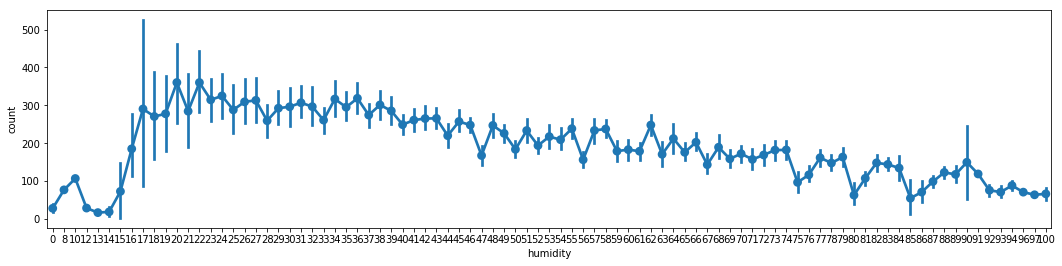

In [27]:
plt.figure(figsize = (18, 4))
sns.pointplot(data=train, x="humidity", y="count")

#### 시각화 결과

1. 분포는 전반적으로 정규 분포가 나오며,이 데이터는 연속형(continuous) 데이터
2. 더 특이한건, 습도가 높은 경우가 많습니다.
3. 또한 습도가 높을수록 자전거를 덜 빌리는 현상이 보이는 것 같으며, 다만 습도가 낮을 경우(16이하)에 자전거 대여량이 낮은 현상이 보입니다. (이는 우리가 예상하지 못한 현상입니다)
4. 불쾌지수 구할 수 있을거 같음

In [35]:
train["discomfort_index"] = 1.8 * train["temp"] - 0.55 * (1 - train["humidity"]*(1/100)) * (1.8 * train["temp"] - 26) + 32

train[["temp","humidity","discomfort_index"]].head()

train["discomfort_index_int"] = train["discomfort_index"].round()

train[["discomfort_index","discomfort_index_int"]].head()


,discomfort_index,discomfort_index_int
0,50.578096,51.0
1,49.310040,49.0
2,49.310040,49.0
3,50.851600,51.0
4,50.851600,51.0


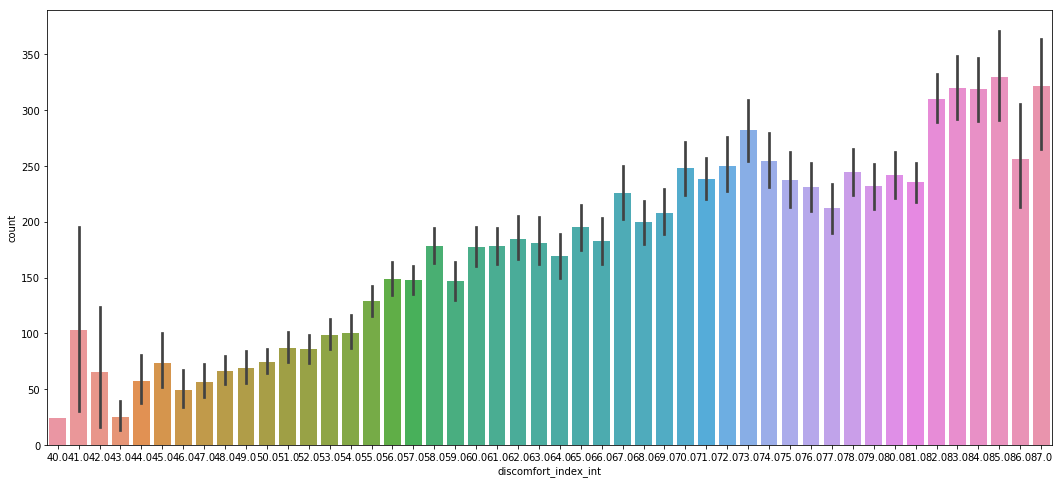

In [36]:
plt.figure(figsize = (18, 8))
sns.barplot(data=train, x="discomfort_index_int", y="count")

#### 예측 모델 개선 방안

1. 이 습도 데이터를 머신러닝 알고리즘에 집어넣으면 머신러닝 알고리즘의 습도에 따른 자전거 대여량의 변화를 스스로 판단할 수 있을 것 같습니다. 더 정확히는, 습도가 낮거나 높을수록 자전거를 덜 빌리고, 습도가 적당할 때 자전거를 더 많이 빌린다는 사실을 알 수 있습니다.
2. 워싱턴은 습도가 기본적으로 높은 편이라는걸 알 수 있습니다.
3. 습도가 낮을경우(16이하)에 왜 낮아지는지, weather, temp 등 다른 데이터들과의 비교가 가능해 세부적인 분석이 가능해보입니다.
4. 불쾌지수에서는 확실한 수치는 아니지만 불쾌지수가 높을때 오히려 대여량이 많아 졌다고 볼 수 있다. 분석 요구됨

#### 9.windspeed

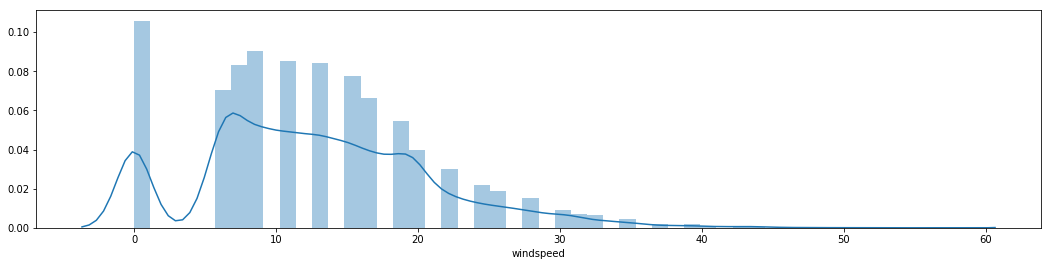

In [30]:
# 시각화

plt.figure(figsize = (18, 4))
sns.distplot(train["windspeed"])

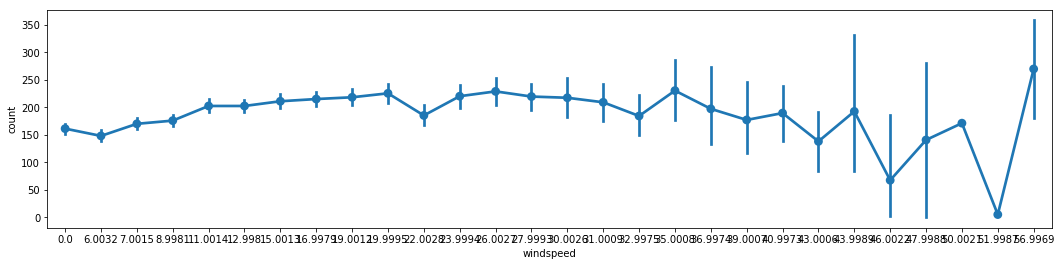

In [31]:
plt.figure(figsize = (18, 4))
sns.pointplot(data=train, x="windspeed", y="count")

#### 시각화 결과

1. 분포는 전반적으로 정규 분포가 나오지만, 1) 값이 연속적(continuous)이지 않고 듬성듬성 떨어져 있습니다. 즉, 이 데이터는 연속형(continuous) 데이터가 아닌 범주형(categorical) 데이터에 가까워 보입니다.
2. 더 특이한건, 풍속이 0인 경우가 굉장히 많으며, 정규 분포가 이상하게 보일 정도로 비중이 높습니다.
3. 또한 풍속이 과하게 높을수록 자전거를 덜 빌리는 현상이 보이는 것 같은데, 이는 전반적으로 모수가 부족한 듯 하여 신뢰도가 높지 않습니다. 다만 풍속이 낮을 경우에 전반적으로 자전거 대여량이 낮은 현상이 보입니다. (이는 우리가 예상하지 못한 현상입니다)

#### 예측 모델 개선 방안

1. 이 풍속(windspeed) 데이터를 머신러닝 알고리즘에 집어넣으면 머신러닝 알고리즘의 풍속에 따른 자전거 대여량의 변화를 스스로 판단할 수 있을 것 같습니다. 더 정확히는, 풍속이 낮거나 높을수록 자전거를 덜 빌리고, 풍속이 적당할 때 자전거를 더 많이 빌린다는 사실을 알 수 있습니다.
1. 워싱턴의 풍속이 보편적으로 심하지 않다는것을 알 수 있습니다. windspeed == 0 일때의 다른 feature들과의 비교 데이터를 분석 해볼 수도 있을 것 같습니다.
1. 풍속이 낮을경우(9이하)에 왜 낮아지는지, weather, temp 등 다른 데이터들과의 비교가 가능해 세부적인 분석이 가능해보입니다.

#### 10.casual

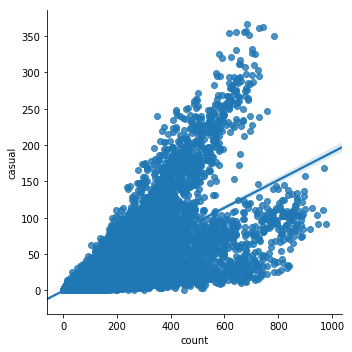

In [32]:
# 시각화

sns.lmplot(data=train, x="count", y="casual")

#### 11.registered

<Figure size 1296x288 with 0 Axes>

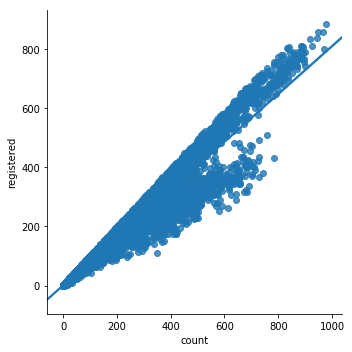

In [33]:
# 시각화

plt.figure(figsize = (18, 4))
sns.lmplot(data=train, x="count", y="registered")

#### 시각화 결과

1. 당연한 결과지만, count의 비중이 registered 비중이 높다.

#### 예측 모델 개선 방안

1. casual, registered 따로 다른 칼럼들과 비교해봐도 세부 분석이 가능해 보인다.